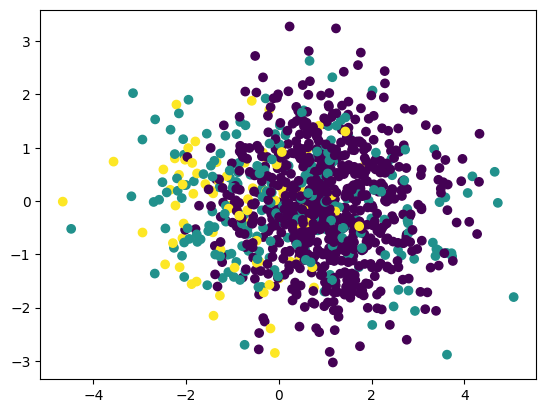

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set the relative proportions of the classes
weights = [0.7, 0.25, 0.15]

# Generate synthetic data with three classes and a class imbalance
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, weights=weights, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [35]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([695, 225,  80], dtype=int64))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.82


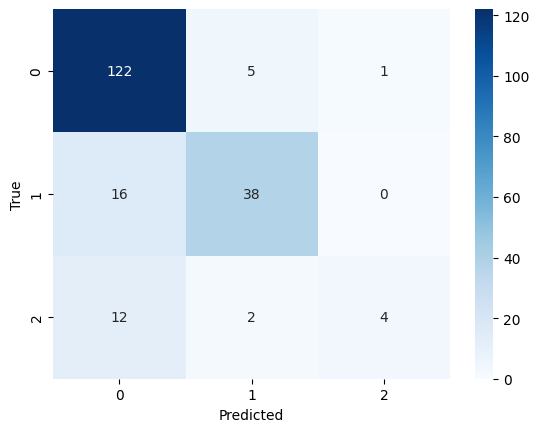

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       128
           1       0.84      0.70      0.77        54
           2       0.80      0.22      0.35        18

    accuracy                           0.82       200
   macro avg       0.82      0.63      0.66       200
weighted avg       0.82      0.82      0.80       200



## Split into two binary models aproach.


Supondo que 0 é sem doença 1-pneumonia tipo 1  e 2- pneumonia tipo 2


### One vs Rest Aproach

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

In [40]:

# Create a logistic regression model with the one-vs-rest approach
lr_ovr = OneVsRestClassifier(LogisticRegression(random_state=42))

# Fit the model to the training data
lr_ovr.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = lr_ovr.predict(X_test)

# Print the accuracy and classification report
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Accuracy: 81.00%
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       128
           1       0.86      0.70      0.78        54
           2       0.50      0.06      0.10        18

    accuracy                           0.81       200
   macro avg       0.72      0.57      0.58       200
weighted avg       0.79      0.81      0.78       200



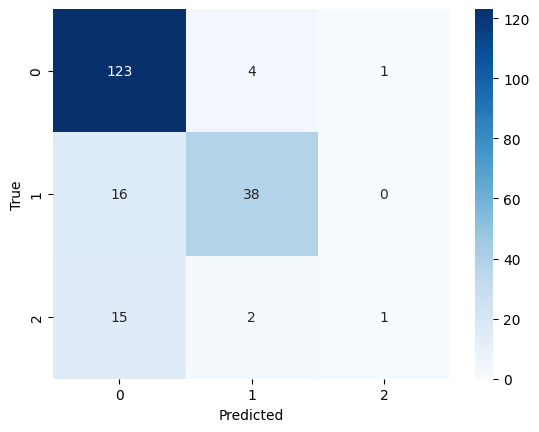

In [41]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### One vs Rest Aproach

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification


# Create a logistic regression model with the one-vs-one approach
lr_ovo = OneVsOneClassifier(LogisticRegression(random_state=42))

# Fit the model to the training data
lr_ovo.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = lr_ovo.predict(X_test)

# Print the accuracy and classification report
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Accuracy: 84.50%
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       128
           1       0.90      0.69      0.78        54
           2       0.82      0.50      0.62        18

    accuracy                           0.84       200
   macro avg       0.85      0.72      0.76       200
weighted avg       0.85      0.84      0.84       200

